In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,confusion_matrix 

In [2]:
df = pd.read_csv("D:/binary.csv")
print("no. of rows = ", df.shape[0],"\nno. of columns = ", df.shape[1])
df.head()

no. of rows =  400 
no. of columns =  4


,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [3]:
df.isnull().sum()

admit    0
gre      0
gpa      0
rank     0
dtype: int64

In [34]:
X = df.drop('admit', axis = 1)  #Using "gre", "gpa", "rank" 
Y = df['admit']

# Splitting the data into training and testing sets (70% train, 30% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=21)

In [5]:
print(X_train.shape, Y_train.shape)   # Should match in row count

(280, 3) (280,)


In [6]:
# Standardizing the features for LDA

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Building the LDA model
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train_scaled, Y_train)

# Predict on test data for Admitting or not Admitting the Student
LDA_pred = LDA.predict(X_test_scaled)

In [19]:
# Adding the predictions to the test set as a new column 'pred_admit'
Y_test = Y_test.reset_index(drop=True)
Y_test = pd.DataFrame(Y_test)
Y_test['pred_admit'] = LDA_pred
Y_test.head()

,admit,pred_admit
0,1,1
1,0,1
2,0,0
3,0,0
4,0,0


In [10]:
# Creating the confusion matrix
cm = pd.crosstab(Y_test['admit'], Y_test['pred_admit'])
cm

pred_admit,0,1
admit,,
0,84,5
1,23,8


             Predicted
           | 0     | 1
    Actual |-------|-------
      0    |  TN   |  FP
      1    |  FN   |  TP


In [11]:
# Extracting TN, FP, FN, TP from the confusion matrix
tn, fp, fn, tp = cm.to_numpy().ravel()   

# The Confusion Matrix(cm) is in Dataframe form then we can'nt directly use "tn, fp, fn, tp = cm.ravel()" this code we can use "numpy" before directly calling ravel to convert the dataframe into array first.

In [12]:
print('True Positive:', tp)
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)

True Positive: 8
True Negative: 84
False Positive: 5
False Negative: 23


In [13]:
# Calculating accuracy manually using the confusion matrix values
accuracy = (tp + tn) / (tp + tn + fp + fn)
accuracy

0.7666666666666667

The accuracy score of 0.7667 (rounded) indicates that the model correctly predicted about 76.67% of the test data.

Final Result: Model Evaluation
# Accuracy: 76.67%%

The model correctly predicted admission status in approximately 76.67%% of cases.

Confusion Matrix Breakdown:

True Positive (TP): Correctly predicted admitted students.

True Negative (TN): Correctly predicted non-admitted students.

False Positive (FP): Incorrectly predicted admitted when not admitted.

False Negative (FN): Incorrectly predicted not admitted when admitted.

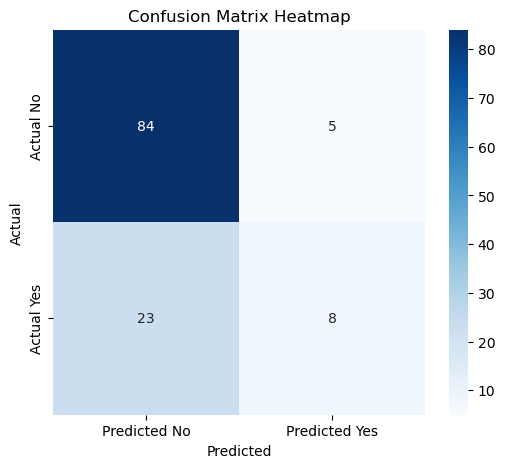

In [44]:
# Confusion matrix values
tp, tn, fp, fn = 8, 84, 5, 23

# Create a confusion matrix array
conf_matrix = np.array([[tn, fp], [fn, tp]])

# Plotting the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])

# Adding titles and labels
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Display the heatmap
plt.show()

In [32]:
# Y_test and LDA_pred are your actual and predicted values
results = pd.DataFrame({'gre score': df["gre"], 'gpa score': df["gpa"], 'Rank': df["rank"], 'Actual admit': Y_test["admit"], 'Predicted admit': Y_test["pred_admit"]})

# Print to check
results.head()

,gre score,gpa score,Rank,Actual admit,Predicted admit
0,380,3.61,3,1.0,1.0
1,660,3.67,3,0.0,1.0
2,800,4.00,1,0.0,0.0
3,640,3.19,4,0.0,0.0
4,520,2.93,4,0.0,0.0


In [33]:
# Save the DataFrame to a CSV file
results.to_csv('D:/Binary_predictions.csv', index=False)

print("File saved successfully!")

File saved successfully!
